# Numerical calculations for "Cosmology ..."

This SageMath notebook performs numerical calculations 
for the note *Calculations for "Cosmology ..."* 
which supplements 
the paper *Cosmology from the two-dimensional renormalization group acting as the Ricci flow*.

This notebook contains the calculations related to the fixed point equation of the Ricci flow.

Notation and section numbering are as in the note *Calculations ...*.

The unit of time is the Hubble time $t_H=H_0^{-1}$ estimated to be $t_H =4.55\times 10^{17}\mathrm{s}=1.44 \times 10^{10}\mathrm{y}$.

The present deceleration parameter is estimated to be $q_0 = -0.60$.

In [1]:
%display latex
LE = lambda latex_string: LatexExpr(latex_string)
#
t_H_in_secs  = 4.55e17
t_H_in_years = 1.44e10
q_0 = -0.6
pretty_print(LE("t_{H}="),t_H_in_secs.n(digits=3),"s",
            LE("="),t_H_in_years.n(digits=3),"y")
pretty_print(LE("q_0="),q_0.n(digits=2))

t_{H}= 4.55e17 's' = 1.44e10 'y'

q_0= -0.60

## 7  The cosmological parameters

### 7.1 Formulas for $H$, $q$, $w$, and $\Omega$

In [2]:
T    = var('T')
#
incomplete_beta(p,q,x)=(x^p/p)*hypergeometric([p,1-q],[p+1],x)
beta(p,q)=incomplete_beta(p,q,1)
#
sqrt3 = sqrt(3)
nu = sqrt3/2 -1/2
#
f_T(T)       = ((cos(T))^2+nu)/(sin(T)*cos(T))
v_T(T)       = (-sqrt3/2)/(sin(T)*cos(T))
a_dimless(T) = (sin(T))^(1+nu)*(cos(T))^(-nu)
t_dimless(T) = (1/2)*incomplete_beta(1+nu/2,1/2-nu/2,(sin(T))^2)
#
H_dimless(T) = f_T(T)/a_dimless(T)
q(T)         = (sqrt3*(cos(T))^2-nu)/((cos(T))^2+nu)^2
w(T)         = 1+(4/3)*(f_T(T)*v_T(T))/(f_T(T)^2+1)
Omega(T)     = 1 + 1/f_T(T)^2


consistency check of the formula for q(T)

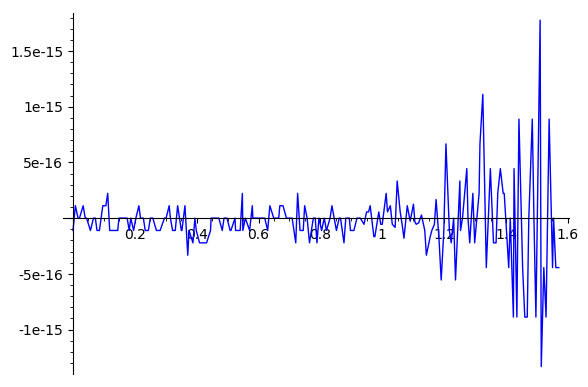

In [3]:
qder(T)         = -f_T^(-2)*f_T.derivative(T)
plot(q-qder,(T,0,pi/2))

### 7.2 Estimate $t_0$, $t_0'$, and $z$

In [4]:
Tx    = var('Tx')
T_0          = N(find_root(q(Tx)==q_0,0,pi/2))
tprime_0     = H_dimless(T_0)  # in units of t_H
#
a(T)         = tprime_0*a_dimless(T)
H(T)         = H_dimless(T)/tprime_0
t(T)         = tprime_0*t_dimless(T)
#
z(T)         = a(T_0)/a(T) - 1
#
t_0            = t(T_0)
t_max          = t(pi/2)
a_0            = a(T_0)
#
w_0            =w(T_0)
Omega_0        =Omega(T_0)
#
T_qeq0       = pi/2-atan(sqrt(2))/2
z_qeq0       = z(T_qeq0)
z_half_T_0   = z(T_0/2)
#
sig = lambda x: x.n(digits=2)
exact = lambda x: x.n(digits=6)
#
pretty_print(LE(r"\nu="),exact(nu),LE(r"\qquad\sqrt{3}="),exact(sqrt3),
             LE(r"\qquad1/\sqrt{3}="),exact(1/sqrt3))
#
pretty_print(LE(r"T_0="),sig(T_0),LE("="),sig(T_0/(pi/2)),LE(r"\,\frac{\pi}{2}"),
            LE(r"\qquad t_0'="),sig(tprime_0),LE(r"\,t_H"),
            LE(r"\qquad t_0="),sig(t_0),LE(r"\,t_H"))
pretty_print(LE(r"a_0="),sig(a_0),LE(r"\,t_H"),
            LE(r"\qquad w_0="),sig(w_0),
            LE(r"\qquad \Omega_0="),sig(Omega_0))
pretty_print(LE(r"t_{\max}="),sig(t_max),LE(r"\,t_H"))
#
pretty_print(r"at  ", LE(r"\;\;q=0:"),
            LE("\quad z="),sig(z_qeq0),
            LE("\qquad T="),exact(T_qeq0),LE("="), exact(T_qeq0/(pi/2)), LE(r"\frac{\pi}{2}"))
pretty_print("at  ", LE(r"\;\;T=\frac12 T_0:\quad z="),sig(z_half_T_0))

\nu= 0.366025 \qquad\sqrt{3}= 1.73205 \qquad1/\sqrt{3}= 0.577350

T_0= 1.2 = 0.77 \,\frac{\pi}{2} \qquad t_0'= 1.1 \,t_H \qquad t_0= 0.73 \,t_H

a_0= 1.5 \,t_H \qquad w_0= -0.61 \qquad \Omega_0= 1.5

t_{\max}= 1.6 \,t_H

'at  ' \;\;q=0: \quad z= 0.18 \qquad T= 1.09314 = 0.695913 \frac{\pi}{2}

'at  ' \;\;T=\frac12 T_0:\quad z= 1.7

### 7.3 The limit $T\rightarrow 0$

In [5]:
coefftT = (tprime_0/(2+nu))
coeffat = tprime_0 * coefftT^(-1/sqrt3)
coeffzt = a_0/coeffat
coefftz = coeffzt^(sqrt3)
coeffHz = ((1+nu)/(2+nu))/coefftz
#
pretty_print(LE(r"\frac{t'_0}{2+\nu}="),sig(coefftT),
            LE(r"\qquad t'_0\left(\frac{2+\nu}{t'_0}\right)^{1/\sqrt{3}}="),sig(coeffat),
            LE(r"\qquad\frac{a_0}{t'_0}\left(\frac{2+\nu}{t'_0}\right)^{-1/\sqrt{3}}="),sig(coeffzt),
            LE(r"\qquad\left(\frac{a_0}{t'_0}\right)^{\sqrt{3}}\left(\frac{2+\nu}{t'_0}\right)^{-1}="),sig(coefftz),
            LE(r"\qquad\left(\frac{a_0}{t'_0}\right)^{-\sqrt{3}}\left(\frac{1+\nu}{t'_0}\right)="),sig(coeffHz),)

\frac{t'_0}{2+\nu}= 0.47 \qquad t'_0\left(\frac{2+\nu}{t'_0}\right)^{1/\sqrt{3}}= 1.7 \qquad\frac{a_0}{t'_0}\left(\frac{2+\nu}{t'_0}\right)^{-1/\sqrt{3}}= 0.86 \qquad\left(\frac{a_0}{t'_0}\right)^{\sqrt{3}}\left(\frac{2+\nu}{t'_0}\right)^{-1}= 0.77 \qquad\left(\frac{a_0}{t'_0}\right)^{-\sqrt{3}}\left(\frac{1+\nu}{t'_0}\right)= 0.75

Calculate and plot the cosmological parameters $H/H_1$, $q$, $w$, $\Omega$ as functions of $z = a(t_0)/a(t) -1$.

### 7.5 Table of parameters for selected z values

In [6]:
#
Tx    = var('Tx')
zlist = [1000,100,10,N(z_half_T_0),1,N(z_qeq0),0]
print zlist
z_params={}
for z_val in zlist:
    T_val=RR(find_root(z(Tx)==z_val,0,pi/2))
    z_params[z_val] = {"z": latex(sig(z_val))}
    z_params[z_val]["T"]= sig(T_val)
    z_params[z_val]["T_normalized"]= sig(T_val/(pi/2))
    z_params[z_val]["H_normalized"]=sig(H(T_val)/H(T_0))
    z_params[z_val]["q"]=sig(sig(q(T_val)))
    z_params[z_val]["w"]=sig(w(T_val))
    z_params[z_val]["Omega"]=sig(Omega(T_val))
    t_val = sig(t(T_val))
    z_params[z_val]["t_in_t_H"]= sig(t_val)
    z_params[z_val]["t_in_secs"]=sig(t_val*t_H_in_secs)
    z_params[z_val]["t_in_years"]=sig(t_val*t_H_in_years)
    z_params[z_val]["label"]=""
z_params[N(z_half_T_0)]["label"]=r"$T=\frac12 T_0$"
z_params[N(z_qeq0)]["label"]=r"$q=0$"
z_params[0]["label"]=r"$t=t_0$"

[1000, 100, 10, 1.68628376855095, 1, 0.176297241220437, 0]


In [7]:
param_names = ["label", "z", "H_normalized", "q", "w", "Omega"]
param_table=[[r"",r"$z$",r"$H/H_0$",r"$q$",r"$w$",r"$\Omega$"]]
param_table.append([r"$z\gg 1$",r"$\gg 1$", str(sig(coeffHz))+r" $z^{1.7}$", sig(q(0)), sig(w(0.001)), sig(Omega(0.001))])
for zkey in zlist:
    p=z_params[zkey]
    row=[]
    for name in param_names:
        row.append(p[name])
    param_table.append(row)
the_table=table(param_table, header_row=False, frame=False,align='center')
the_table

$z$        $H/H_0$        $q$     $w$    $\Omega$
     $z\gg 1$       $\gg 1$   0.75 $z^{1.7}$   0.73    0.16      1.0
                     1000.       120000.       0.73    0.16      1.0
                     100.         2200.        0.73    0.15      1.0
                      10.          48.         0.74    0.15      1.0
  $T=\frac12 T_0$     1.7          4.1         0.74    0.079     1.2
                      1.0          2.4         0.69    0.021     1.3
       $q=0$         0.18          1.1         0.00    -0.33     1.5
      $t=t_0$        0.00          1.0         -0.60   -0.61     1.5

In [8]:
latex(the_table)

\begin{tabular}{cccccc}
 & $z$ & $H/H_0$ & $q$ & $w$ & $\Omega$ \\
$z\gg 1$ & $\gg 1$ & 0.75 $z^{1.7}$ & $0.73$ & $0.16$ & $1.0$ \\
 & 1000. & $120000.$ & $0.73$ & $0.16$ & $1.0$ \\
 & 100. & $2200.$ & $0.73$ & $0.15$ & $1.0$ \\
 & 10. & $48.$ & $0.74$ & $0.15$ & $1.0$ \\
$T=\frac12 T_0$ & 1.7 & $4.1$ & $0.74$ & $0.079$ & $1.2$ \\
 & 1.0 & $2.4$ & $0.69$ & $0.021$ & $1.3$ \\
$q=0$ & 0.18 & $1.1$ & $0.00$ & $-0.33$ & $1.5$ \\
$t=t_0$ & 0.00 & $1.0$ & $-0.60$ & $-0.61$ & $1.5$ \\
\end{tabular}

### 7.6 Plot of the cosmological parameters

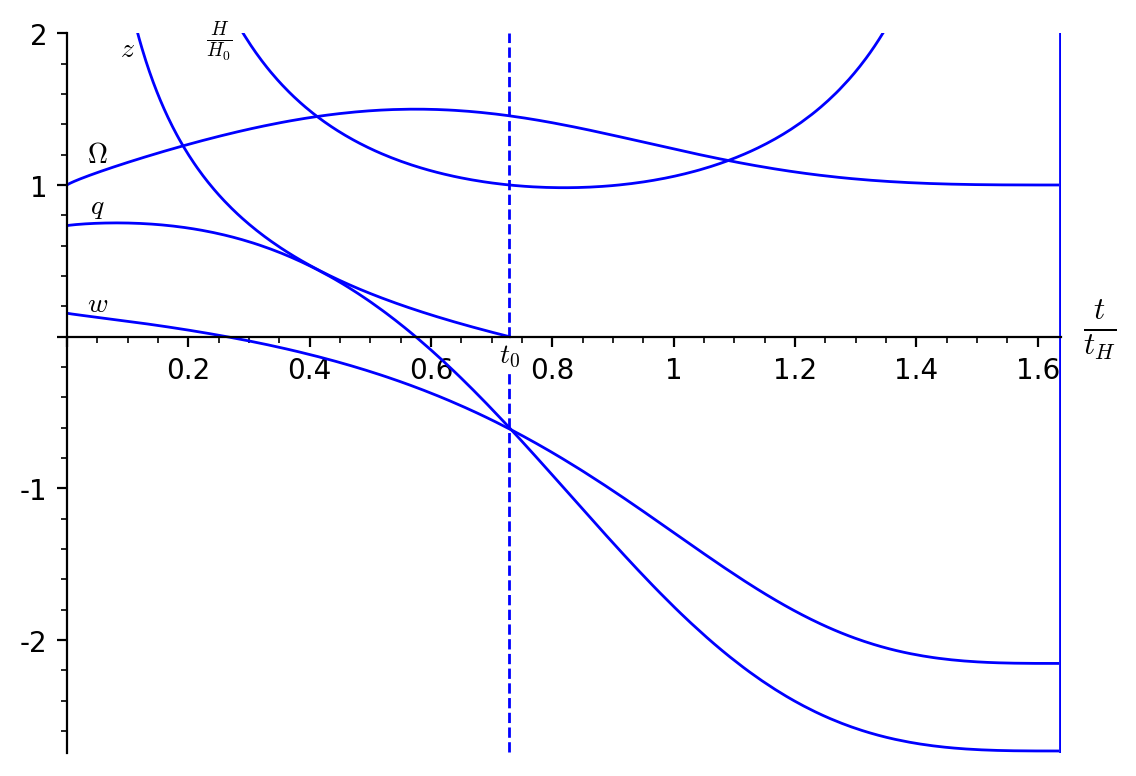

In [9]:
my_ymin = N(-1/nu-.01)
my_ymax= 2.0
#my_ymin = -1/nu-.1
#my_ymax= 2.01387
parts=[]
# plot z
parts.append(parametric_plot((lambda T: t(T), z(T)), (T, 0.3*pi/2, T_0)))
parts.append(text("$z$",(0.1,1.9),color="black"))
# plot q
parts.append(parametric_plot((lambda T: t(T), q(T)), (T, 0, pi/2)))
parts.append(text("$q$",(0.05,0.86),color="black"))
# plot w
parts.append(parametric_plot( (lambda T: t(T), w(T)), (T, 0, pi/2)))
parts.append(text("$w$",(0.05,0.22),color="black"))
# plot Omega
parts.append(parametric_plot( (lambda T: t(T), Omega(T)), (T, 0, pi/2)))
parts.append(text(r"$\Omega$",(0.05,1.2),color="black"))
# plot H
parts.append(parametric_plot((lambda T: t(T), H(T)), (T, 0.52*pi/2, 0.9625*pi/2)))
parts.append(text(r"$\frac{H}{H_0}$",(0.25,1.95),color="black"))
#parts.append(text(r"$\frac{H}{H_0}$",(1.42,1.95),color="black"))
# draw vertical dashed line at t_0
parts.append(line([(t_0,0.00),(t_0,my_ymax-.001)],linestyle="dashed"))
parts.append(line([(t_0,my_ymin+.001),(t_0,-0.22)],linestyle="dashed"))
parts.append(text(r"$t_0$",(t_0,-0.12),color="black",horizontal_alignment="center"))
# draw vertical solid line at t_max
parts.append(line([(t_max,my_ymin+.001),(t_max,my_ymax-.001)]))
param_plot=sum(parts)
show(param_plot,ymin=my_ymin,ymax=my_ymax,xmax=t_max+.001,dpi=200,aspect_ratio=0.25,axes_labels=[r"$\frac{t}{t_H}$",""],axes_pad=0)
plot(param_plot).save('parameter_plot.pdf',ymin=my_ymin,ymax=my_ymax,dpi=200,aspect_ratio=0.25,axes_labels=[r"$\frac{t}{t_H}$",""],axes_pad=0)

### 7.7 Plot the conformal diagram

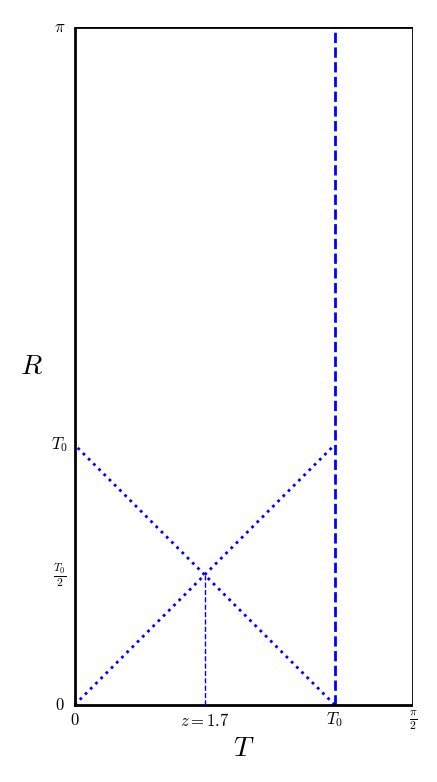

In [10]:
parts = [line([(T_0,0),(T_0,pi)],linestyle="dashed")]
parts.append(line([(T_0,0),(0,T_0)],linestyle="dotted"))
parts.append(line([(0,0),(T_0,T_0)],linestyle="dotted"))
parts.append(line([(0,0), (pi/2,0), (pi/2,pi),(0,pi),(0,0)],
                    color="black",axes=False))
parts.append(line([(T_0/2,0),(T_0/2,T_0/2)],linestyle="dashed",
            thickness=0.5))
parts.append(text("$T$",(0.25*pi,-.2),color="black"))
parts.append(text("$T_0$",(T_0,-.07),color="black",fontsize=6))
parts.append(text("$0$",(0,-.07),color="black",fontsize=6))
parts.append(text(r"$\frac{\pi}{2}$",(pi/2,-.07),
                  color="black",fontsize=6))
zstr = r"$z{=}"+str(sig(z_half_T_0)) +"$"
parts.append(text(zstr,(T_0/2,-.07),color="black",fontsize=6))
parts.append(text("$R$",(-.2,pi/2),color="black"))
parts.append(text("$0$",(-.07,0),color="black",fontsize=6))
parts.append(text(r"$\frac{T_0}{2}$",(-.07,T_0/2),color="black",fontsize=6))
parts.append(text("$T_0$",(-.07,T_0),color="black",fontsize=6))
parts.append(text("$\pi$",(-.07,pi),color="black",fontsize=6))
diagram = sum(parts)
show(diagram,dpi=200,aspect_ratio=1,axes=False,axes_pad=0,
     ticks=[[],[]])
plot(diagram).save('conformal_diagram.pdf',dpi=200,aspect_ratio=1,axes=False,axes_pad=0,
     ticks=[[],[]])

## 8 Analysis of the real-time ode continued

### 8.1 Real-time phase portrait

In [11]:
solver_step_size = 0.01   # step_size in T for the trajectories returned by the ode solver
hmax=10.0                 # cutoff on h values

#### Trajectories to plot  
    traj is a dictionary of trajectories.  
    The dictionary key is the initial condition $(h_{-},h_{+})_{T=0}$ of the trajectory.  
        e.g., traj[(-1,1)] is the trajectory that passes through $(-1,1)$ at $T=0$.  
    traj[key] is itself a dictionary with keys  
          "end_points"  =  [$T_i$, $T_f$] the initial and final values of $T$  
          "arrow_pos"   =  where on the trajectory to put the arrow (as a fraction of  
                           the number of points in the trajectory
          "dot_size"
          "dot_color"
    
    

In [12]:
traj= {}
traj[(1,-1)] = {"end_points": [-0.55,0.65],"arrow_pos": 0.99, "dot_size":5, "dot_color":"red"}
traj[(-1,1)] = {"end_points": [-0.65,0.55],"arrow_pos": 0.005, "dot_size":5, "dot_color":"red"}
traj[(0,0)]  = {"end_points": [-1.3,1.3]}
traj[(2,0)]  = {"end_points": [-0.2,2.3], "arrow_pos":0.23}
traj[(-2,0)] = {"end_points": [-2.3,0.2], "arrow_pos":0.77}
traj[(4,0)]  = {"end_points": [-0.016,2.3], "arrow_pos":0.153}
traj[(-4,0)] = {"end_points": [-2.3,0.016], "arrow_pos":0.847}
traj[(-1.4168,-6)] = {"end_points": [-0.3,1.2], "arrow_pos":0.999}
traj[(1.4168,6)]  = {"end_points": [-1.2,0.3], "arrow_pos":0.001}
traj[(-.75,-4)] = {"end_points": [-2,0.53], "arrow_pos":0.99}
traj[(.75,4)]  = {"end_points": [-0.53,2], "arrow_pos":0.01}
#traj[(-.45,-4)] = {"end_points": [-1.65,0.236], "arrow_pos":0.98}
#traj[(.45,4)]  = {"end_points": [-0.236,1.65], "arrow_pos":0.02}
traj[(-.15,-4)] = {"end_points": [-1.2,0.16], "arrow_pos":0.972}
traj[(.15,4)]  = {"end_points": [-0.16,1.2], "arrow_pos":0.028}
traj[(1.5,-1.5)] = {"end_points": [-0.3,0.23], "arrow_pos":0.94}
traj[(-1.5,1.5)]  = {"end_points": [-0.23,0.3], "arrow_pos":0.06}
traj[(2,-2)] = {"end_points": [-0.2,0.118], "arrow_pos":0.9}
traj[(-2,2)]  = {"end_points": [-0.118,0.2], "arrow_pos":0.1}
traj[(2.5,-2.5)] = {"end_points": [-0.12,0.06], "arrow_pos":0.8}
traj[(-2.5,2.5)]  = {"end_points": [-0.06,0.12], "arrow_pos":0.2}
traj[(-3,-5)]  = {"end_points": [-2.0,0.14], "arrow_pos":0.925}
traj[(3,5)]  = {"end_points": [-0.14,2.0], "arrow_pos":0.075}

#### Define a function that Integrates the ode numerically for given initial conditions and plots the trajectory

The function make_traj takes as argument a key of the traj dictionary.  
  It adds to traj[key] 5 dictionary items  
             traj[key]["calculated"]  = output from the ode solver  
             traj[key]["chopped"]     = list of points $(h_{-},h_{+})$ to plot  
             traj[key]["chopped_fv"]  = list of points $(f_{T},v_{T})$ to plot  
             traj[key]["plotted"]     = $(h_{-},h_{+})$ trajectory plotted  
             traj[key]["plotted_fv"]  = $(f_{T},v_{T})$ trajectory plotted  
 


In [13]:
from sage.calculus.desolvers import desolve_system_rk4
sqrt3=N(sqrt(3))
lambdaplus = 2+sqrt3
lambdaminus = 2-sqrt3
betaplus=1+sqrt3/3
betaminus=1-sqrt3/3
#dot_color = var('dot_color')
def make_traj(key):
    my_arrow = lambda p1,p2: arrow(p1,p2,arrowsize=2.0,width=0.1,color=dot_color)
    hplus,hminus,T=var('hplus hminus T')
    ode_function=[-1-hminus^2+lambdaminus*(hplus*hminus+1),-1-hplus^2+lambdaplus*(hplus*hminus+1)]
    traj_solved=desolve_system_rk4(ode_function,[hminus,hplus],ics=[0]+list(key),
                                 ivar=T,end_points=traj[key]["end_points"],step=solver_step_size)
    traj[key]["calculated"]=traj_solved
    traj_list = []
    traj_list_fv = []
    for T,hminus,hplus in traj_solved:
        if abs(hplus) <= hmax and abs(hminus) <= hmax:
            traj_list.append([hminus,hplus])
        f_T = (sqrt3/2)*(betaplus*hminus-betaminus*hplus)
        v_T = (sqrt3/2)*(hplus-hminus)
        traj_list_fv.append([f_T,v_T])
    traj[key]["chopped"]=traj_list
    traj[key]["chopped_fv"]=traj_list_fv
    dot_size = 1
    if "dot_size" in traj[key]:
        dot_size = traj[key]["dot_size"]
    dot_color="blue"
    if "dot_color" in traj[key]:
        dot_color = traj[key]["dot_color"]
    traj[key]["plotted"]=list_plot(traj_list,size=dot_size,color=dot_color)
    traj[key]["plotted_fv"]=list_plot(traj_list_fv,size=dot_size,color=dot_color)
    Npoints = len(traj_list)
    arrow_index=int(Npoints/2)
    Npoints_fv = len(traj_list_fv)
    arrow_index_fv=int(Npoints_fv/2)
    if "arrow_pos" in traj[key]:
        arrow_index    = int(traj[key]["arrow_pos"]*Npoints)
        arrow_index_fv = int(traj[key]["arrow_pos"]*Npoints_fv)
    arrow_index = min(Npoints-2,arrow_index)
    arrow_index_fv = min(Npoints_fv-2,arrow_index_fv)
    arrow_p1 = traj_list[arrow_index]
    arrow_p2 = traj_list[arrow_index+1]
    traj[key]["plotted"]+=my_arrow(arrow_p1,arrow_p2)
    arrow_p1 = traj_list_fv[arrow_index_fv]
    arrow_p2 = traj_list_fv[arrow_index_fv+1]
    traj[key]["plotted_fv"]+=my_arrow(arrow_p1,arrow_p2)

#### Integrate and plot the individual trajectories

In [14]:
for key in traj:
    make_traj(key)

#### Construct the two phase portraits and save as pdf files

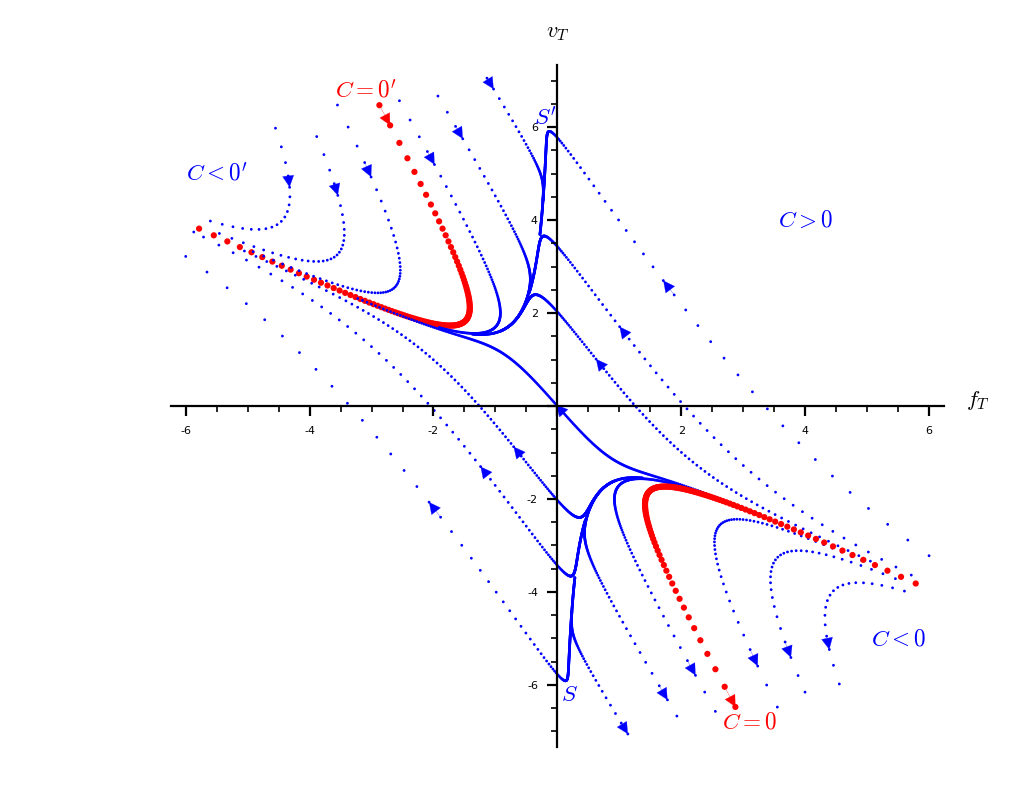

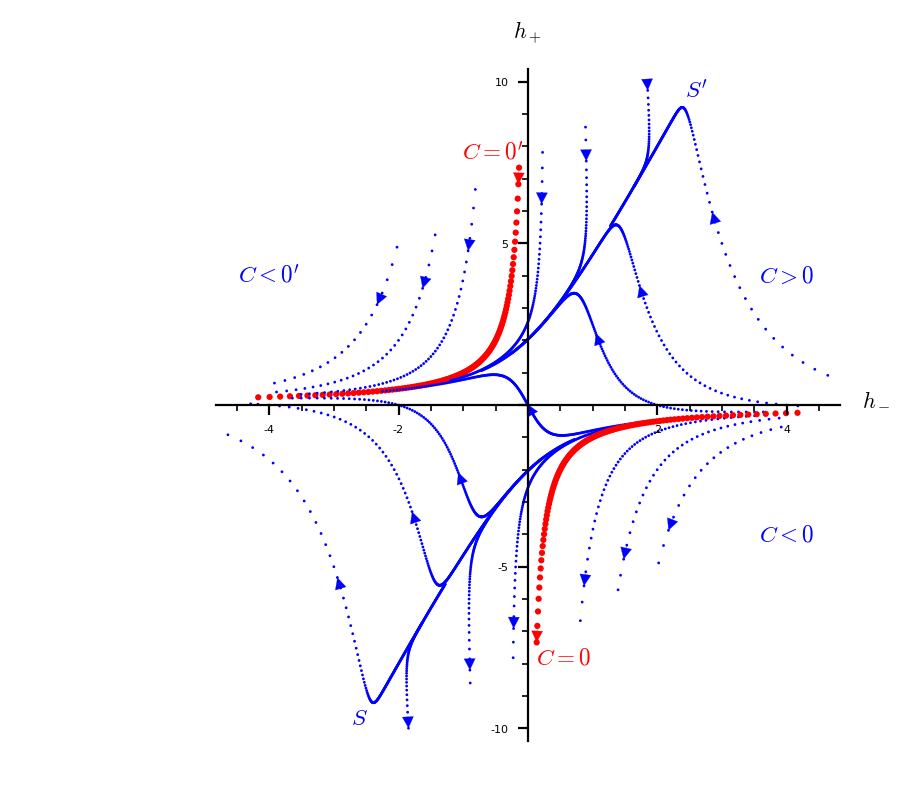

In [15]:
LP = sum(traj[key]["plotted_fv"] for key in traj)
my_font_size='small'
LP+= text(r"$C{=}0$",(3.1,-6.8),fontsize=my_font_size,color="red")
LP+= text(r"$C{=}0'$",(-3.1,6.8),fontsize=my_font_size,color="red")
LP+= text(r"$C{<}0'$",(-5.5,5),fontsize=my_font_size)
LP+= text(r"$C{<}0$",(5.5,-5),fontsize=my_font_size)
LP+= text(r"$C{>}0$",(4,4),fontsize=my_font_size)
LP+= text(r"${S}$",(0.19,-6.2),fontsize=my_font_size)
LP+= text(r"${S'}$",(-0.19,6.2),fontsize=my_font_size)
LP.fontsize(4)
plot(LP).save('phase_portrait_fv.pdf',dpi=200,aspect_ratio=0.75,
              axes_labels=['$f_T$','$v_T$'],axes_labels_size=2)
show(LP,aspect_ratio=0.75,dpi=200,axes_labels=['$f_T$','$v_T$'],
    axes_labels_size=2)
LP = sum(traj[key]["plotted"] for key in traj)
LP+= text(r"$C{=}0$",(0.55,-7.8),fontsize=my_font_size,color="red")
LP+= text(r"$C{=}0'$",(-0.55,7.8),fontsize=my_font_size,color="red")
LP+= text(r"$C{<}0$",(4,-4),fontsize=my_font_size)
LP+= text(r"$C{<}0'$",(-4,4),fontsize=my_font_size)
LP+= text(r"$C{>}0$",(4,4),fontsize=my_font_size)
LP+= text(r"${S}$",(-2.6,-9.7),fontsize=my_font_size)
LP+= text(r"${S'}$",(2.6,9.7),fontsize=my_font_size)
LP.fontsize(4)
plot(LP).save('phase_portrait_hh.pdf',dpi=200,aspect_ratio=0.5,
              axes_labels=[r"$h_-$",r"$h_+$"],axes_labels_size=2)
show(LP,dpi=200,aspect_ratio=0.5,axes_labels=[r"$h_-$",r"$h_+$"],
    axes_labels_size=2)

### 8.4 Asymptotic behavior of the separatrices $S$, $S'$

$
T\rightarrow \pm \infty
\qquad
f_{T} = \sum_{m=0} f_{m} T^{-2m-1}
\qquad
v_{T} = -T+\sum_{m'=0} v_{m'} T^{-2m'-1}
\qquad
f_{0}=1
$


calculate $\quad\tilde f_m = f_m/m! \qquad\tilde v_m = v_m/m!$

In [16]:
N_tilde_coeffs =2000
f_tilde_coeffs = [1.0]
v_tilde_coeffs = []
for m_tilde in range(N_tilde_coeffs+1):
    ff_sum=sum(f_tilde_coeffs[mp]*f_tilde_coeffs[m_tilde-mp]/binomial(m_tilde,mp) for mp in range(m_tilde+1))
    v_tilde_coeffs.append(-2*f_tilde_coeffs[m_tilde] + ff_sum/(2*m_tilde+1))
    fv_sum=sum(f_tilde_coeffs[mp]*v_tilde_coeffs[m_tilde-mp]/binomial(m_tilde,mp) for mp in range(m_tilde+1))
    f_tilde_coeffs.append(-(m_tilde+1/2)*f_tilde_coeffs[m_tilde]/(m_tilde+1)+(ff_sum+fv_sum)/(m_tilde+1))


plot $m \ln\left(\frac{-\tilde f_m}{\tilde f_{m-1}}\right)$
and $m \ln\left(\frac{-\tilde v_m}{\tilde v_{m-1}}\right)$

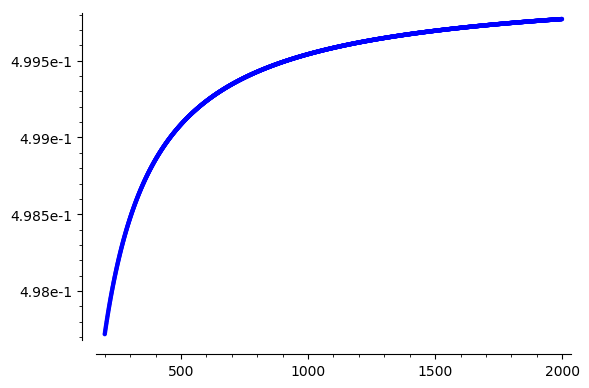

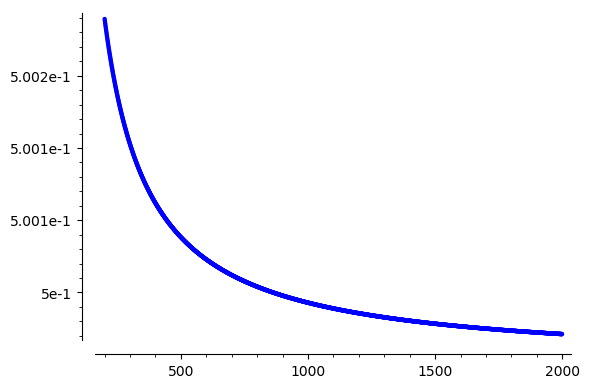

In [17]:
f_ratios = [[mm,mm*ln(((-f_tilde_coeffs[mm]/f_tilde_coeffs[mm-1])).n())] for mm in range(int(0.1*N_tilde_coeffs),N_tilde_coeffs)]
v_ratios = [[mm,mm*ln(((-v_tilde_coeffs[mm]/v_tilde_coeffs[mm-1])).n())] for mm in range(int(0.1*N_tilde_coeffs),N_tilde_coeffs)]
show(list_plot(f_ratios)); show(list_plot(v_ratios))

Plot the expansions in the $(f_T,v_T)$ plane

In [18]:
Ry.<y> = RR[]
f_poly = 0*y
v_poly = 0*y
for mm in range(N_tilde_coeffs):
    f_poly += f_tilde_coeffs[mm]*factorial(mm) *y^(2*mm+1)
    v_poly += v_tilde_coeffs[mm]*factorial(mm) *y^(2*mm+1)
def fv_plot(T_i,T_f,T_int):
    point_list=[]
    N_plot = int((T_f-T_i)/T_int)
    for k in range(N_plot):
        T_val = T_i+k*T_int
        y_val = 1.0/T_val
        f_T_val = f_poly(y=y_val)
        v_T_val = -T_val + v_poly(y=y_val)
        point_list.append([f_T_val,v_T_val])
    show(list_plot(point_list))

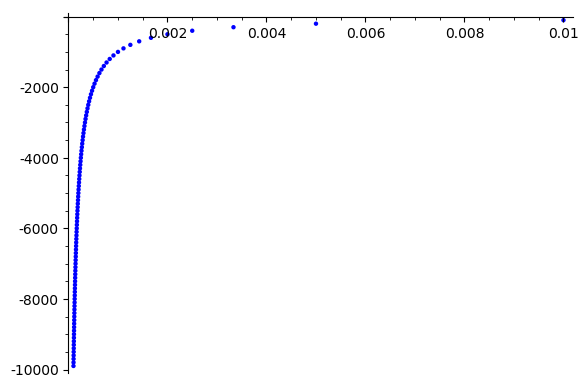

In [19]:
fv_plot(100.0,10000.0,100.0)

The expansions break down at $T\approx 27.2$

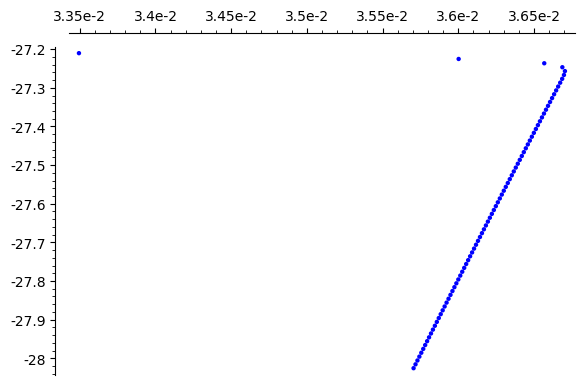

In [20]:
fv_plot(27.18,28.0,.01)

Calculate the coefficients of $m^{1/2}$ in $\tilde f_m$ and $\tilde v_m$

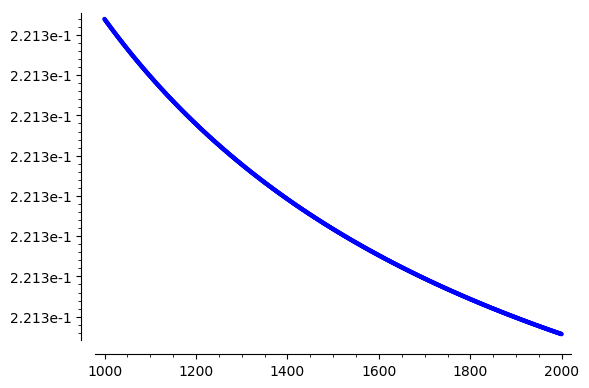

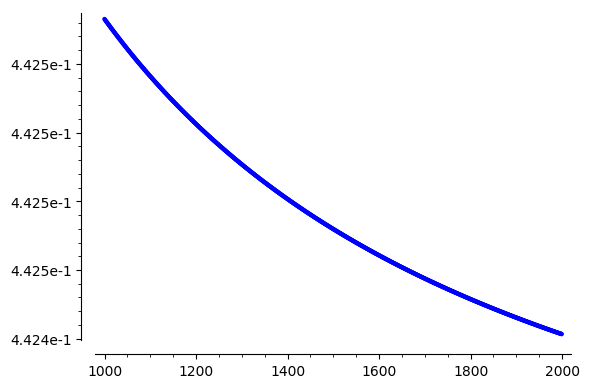

In [21]:
f_norms = [[mm,(-1)^mm*f_tilde_coeffs[mm]/(mm^0.5)] for mm in range(int(0.5*N_tilde_coeffs),N_tilde_coeffs)]
v_norms = [[mm,(-1)^(mm+1)*v_tilde_coeffs[mm]/(mm^0.5)] for mm in range(int(0.5*N_tilde_coeffs),N_tilde_coeffs)]
show(list_plot(f_norms)); show(list_plot(v_norms))